<a href="https://colab.research.google.com/github/sechmo/IA-minirobots-2023-II/blob/master/6.%20Machine%20Learning/3.%20Improved%20CO2/co2Prediccion_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pub.towardsai.net/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa

https://pub.towardsai.net/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0

# 1 Regresion Lineal

La Regresion Lineal es un enfoque estadistico que modela la relacion entre features de entrada y la salida. Las features de entrada se llaman las variables independientes y la salida que se llama la variable dependiente. La meta aqui es predecir el vslor de la salida con base en las features de entrada multiplicadas por sus coeficientes optimos.

Algunos ejemplos de egresion lineal

1 Predecir ventas de productos

2 Predecir el crecimiento economico

3 Predecir predios de un determinado producto

4 Predecir las emisiones de un carro uevo

# Hay dos tipos de regresion

Regresion Lineal Simple

Regresion lineal multivariada

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
data = pd.read_csv("/content/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Se seleccionan los atributos que consideramos para predecir los valores

La meta es predecir los valores de "emisiones de CO2" a partir del tamaño del motor en nuestro dataset

In [ ]:
data = data[["ENGINESIZE", "CO2EMISSIONS"]]

# Se dibujan los datos

podemos visulaizar los datos en un scatter plot

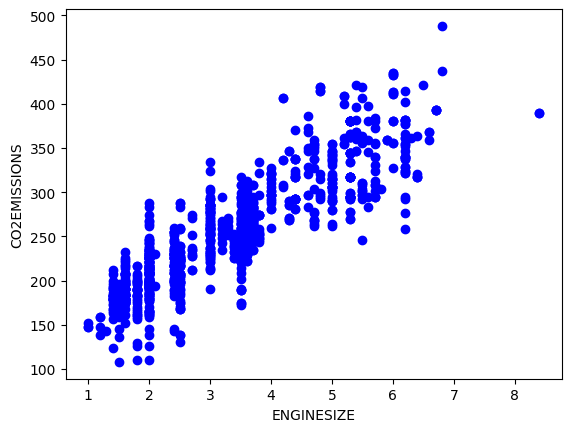

In [ ]:
plt.scatter(data["ENGINESIZE"], data["CO2EMISSIONS"], color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

# Se dividen los datos en datos de entrenamiento y datos de prueba

Para verificar la precision de un modelo se divien los datos en dataset de entrenamiento y dataset de prueba. se usarna los daos de entrenamiento para entrenar el modelo y los datos de prueba para verificar la precision de nuestro modelo.

In [ ]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

# Entrenando el modelo

Aqui se entrena el modelo y encuentra los coeficientes de la linea de regresion que mejor satisface

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)

print("Coeficientes: ", regr.coef_)
print("Intercepcion: ", regr.intercept_)


Coeficientes:  [[38.79512384]]
Intercepcion:  [127.16989951]


# Dibujo de la mejor linea

Con base en el coeficiente, vamos a dibujar la mejor linea para el dataset

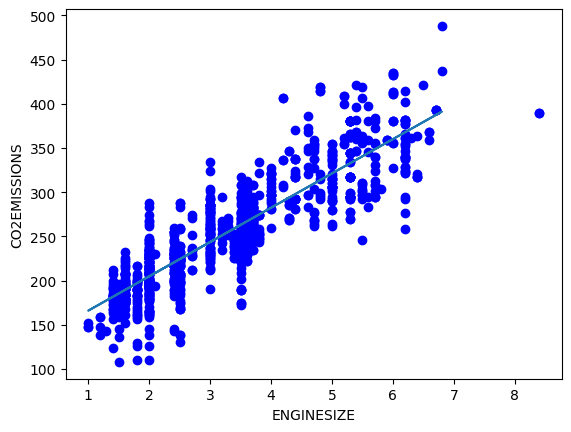

In [ ]:
plt.scatter(data["ENGINESIZE"], data["CO2EMISSIONS"], color = "blue")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

# Funcion de prediccion

Vamos a usar una funcion de prediccion, con el conjunto de prueba

In [ ]:
def get_regression_prediccion(input_features, intercept, slope):
    predicted_values = input_features * slope + intercept
    return predicted_values

# Prediccion de emisiones CO2

Se predice el valor de las emiisones de CO2 con base en la recta de prediccion

In [ ]:
my_engine_size = 3.5
estimate_emission = get_regression_prediccion(my_engine_size, regr.intercept_[0], regr.coef_[0][0])
print("Emision estimada: ", estimate_emission)

Emision estimada:  262.9528329350173


# Verificamos la precision con el dataset de prueba



Podemos verificar la precision de un modelo comparando los valores reales con los valores que se predicen con el dataset de entrenamiento

In [ ]:
from sklearn.metrics import r2_score

test_x = np.array(train[["ENGINESIZE"]])
test_y = np.array(train[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("Media del error absoluto: %.2f"% np.mean(np.absolute(test_y_ - test_y)))
print("Suma media de los cuadrados (MSE): %.2f"% np.mean((test_y_ - test_y)**2))
print("R2 Score: %.2f"% r2_score(test_y_, test_y))

Media del error absoluto: 24.09
Suma media de los cuadrados (MSE): 997.45
R2 Score: 0.68


# Regresion Lineal Multivariada

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
data = pd.read_csv("/content/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Definimos X y Y

En X se almacenan las features de entrada y Y almacena el valor de salida

In [ ]:
X = data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]]
Y = data["CO2EMISSIONS"]

# Se dividen los datos en dataset de entrenamiento y dataset de prueba

Se van a usar el 80% de los datos ocmo datset de entrenamiento y 20 % como dataset de prueba

In [ ]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

# Entrenamiento del modelo

Se va a entrenar el modelo con el 80% de los datos

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY",
                          "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)


# Encuentra los coeficientes de los features de entrada

Ahora necesitamos saber que feature tiene mas efecto significativo sobre la variable de salida. Para esto se imprimen los valores de los coeficientes.
Observe que los valores negativos tienen un efecto inverso sobre la salida, es decir, que si ese valor aumenta entonces el valor de la salida disminuye.

In [ ]:
coeff_data = pd.DataFrame(regr.coef_.T, X.columns.T, columns = ["coeficientes"])
coeff_data

,coeficientes
ENGINESIZE,7.873147
CYLINDERS,8.408908
FUELCONSUMPTION_CITY,-3.368325
FUELCONSUMPTION_HWY,2.742498
FUELCONSUMPTION_COMB,3.851251
FUELCONSUMPTION_COMB_MPG,-4.082913


# Función de predicción

Usamos la misma funcion de predicción anterior solo que ahora se operar con matrices.

In [ ]:
def get_regression_prediccion_mul(input_features, intercept, slope):
    predicted_values = np.matmul(input_features, slope) + intercept
    return predicted_values

# Predicción de emisiones

Como vemos esta vez debemos definir un vector como entrada para nuestro modelo

In [ ]:
my_engine_values = [3.5,4,12.7,8.7,6.7,28]
estimate_emission = get_regression_prediccion_mul(my_engine_values, regr.intercept_, regr.coef_[0])
print("Emision estimada: ", estimate_emission)

# Verificamos con el dataset de prueba

Usamos la particion que habiamos creado antes en test (20%) para probar el modelo y usamos la metrica r2 para medir el desempeño de nuestro modelo.

In [ ]:
from sklearn.metrics import r2_score

test_x = np.array(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY",
                          "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]])
test_y = np.array(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("Media del error absoluto: %.2f"% np.mean(np.absolute(test_y_ - test_y)))
print("Suma media de los cuadrados (MSE): %.2f"% np.mean((test_y_ - test_y)**2))
print("R2 Score: %.2f"% r2_score(test_y_, test_y))

Media del error absoluto: 10.77
Suma media de los cuadrados (MSE): 222.36
R2 Score: 0.93


Al comparar podemos ver que el modelo con regression lineal multivariada es mucho mejor que el modelo de regresion lineal con una sola variable comparando los R2 scores

# Nuevo modelo SVM

Usando la particion de la anterior seccion probaremos un nuevo modelo SVM(Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma='auto', kernel="linear")
train_x = np.array(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY",
                          "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]])
train_y = np.array(train[["CO2EMISSIONS"]])

model.fit(train_x, train_y)

Probamos el modelo con el conjunto de datos en test

In [ ]:
from sklearn.metrics import r2_score

test_x = np.array(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY",
                          "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]])
test_y = np.array(test[["CO2EMISSIONS"]])
test_y_ = model.predict(test_x)

print("Media del error absoluto: %.2f"% np.mean(np.absolute(test_y_ - test_y)))
print("Suma media de los cuadrados (MSE): %.2f"% np.mean((test_y_ - test_y)**2))
print("R2 Score: %.2f"% r2_score(test_y_, test_y))

Media del error absoluto: 64.34
Suma media de los cuadrados (MSE): 6734.74
R2 Score: 0.94


Como vemos este modelo con mayor cantidad de parametros es mejor que los dos anteriores, con un r2 de 0.94

# Añadiendo mas variables

Como vimos en la anterior seccion añadir mas variables ayudo a mejorar el rendimiento del modelo, ahora usaremos OneHotEncoding para añadir las variables categoricas.

In [ ]:
data = pd.read_csv("/content/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Usamos la funcion get_dummies para obtener una columna por cada categoria posible por lo que ahora el shape de nuestro dataset es de 1067 x 89

In [ ]:
data.drop(columns=['MODEL'], inplace=True)

In [ ]:
data = pd.get_dummies(data)
data.shape

(1067, 89)

Dividimos el dataset en train y test

In [ ]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

Entrenamos el modelo

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train.drop(columns=['CO2EMISSIONS']))
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)

In [ ]:
from sklearn.metrics import r2_score

test_x = np.array(test.drop(columns=['CO2EMISSIONS']))
test_y = np.array(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("Media del error absoluto: %.2f"% np.mean(np.absolute(test_y_ - test_y)))
print("Suma media de los cuadrados (MSE): %.2f"% np.mean((test_y_ - test_y)**2))
print("R2 Score: %.2f"% r2_score(test_y_, test_y))

Media del error absoluto: 4.77
Suma media de los cuadrados (MSE): 35.31
R2 Score: 0.99


Vemos que el modelo de regresion lineal con mayor cantidad de parametros es mejor que los anteriores con un R2 de 0.99